In [33]:
import SimpleITK as sitk
import numpy as np
import nibabel as nib
import scipy
from skimage.measure import label
import napari

### Функция загрузки DICOM файла, на выходе получаем numpy array

In [34]:

def load_dicom(directory):
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(directory)
    reader.SetFileNames(dicom_names)
    image_itk = reader.Execute()

    image_zyx = sitk.GetArrayFromImage(image_itk).astype(np.int16)
    return image_zyx 

In [35]:
data = load_dicom('./subset_img/subset/LUNG1-001/1.3.6.1.4.1.32722.99.99.239341353911714368772597187099978969331/09-18-2008//1.3.6.1.4.1.32722.99.99.298991776521342375010861296712563382046')

In [36]:
data.shape

(134, 512, 512)

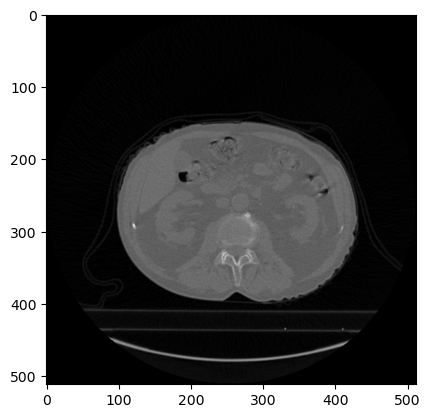

In [37]:
import matplotlib.pyplot as plt
image_2d = data[0]
plt.imshow(image_2d, cmap='gray')


In [38]:
# загрузка маски сегментации
mask = nib.load('./subset_masks/subset_masks/LUNG1-001/LUNG1-001_effusion_first_reviewer.nii.gz')
mask = mask.get_fdata().transpose(2, 0, 1)
mask = scipy.ndimage.rotate(mask, 90, (1, 2))

In [39]:
mask.shape

(134, 512, 512)

### Интерактивная визуалиция данных

In [40]:

napari_data = label(mask)

In [41]:
# интерактивная визуализация данных и маски
viewer = napari.Viewer()
viewer.add_image(data, name='DICOM')
viewer.add_labels(mask.astype(int), name='Mask')

<Labels layer 'Mask' at 0x11f0f00dc40>

In [42]:
napari.run()

![Alt Text](napari.gif)

